In [1]:
import numpy as np

from scipy.integrate import quad

In [2]:
def Eichebrecher ( dataset ):
    
    N = len( dataset )
    
    dataset = np.asarray( dataset )
    
    fourier = np.empty (N, dtype = complex)
    
    for i  in range (N):
        
        fourier[i] = np.sum( [ dataset[k] * np.exp ( 2j * np.pi * k * i / N ) for k in range (N) ] )
        
    return fourier

In [3]:
def Umgekehrteichebrecher ( fourier ):
    
    N = len( fourier )
    
    fourier = np.asarray( fourier )
    
    dataset = np.empty (N, dtype = complex)
    
    for i  in range (N):
        
        dataset[i] = np.sum( [ fourier[k] * np.exp ( - 2j * np.pi * k * i / N ) for k in range (N) ] ) / N
        
    return dataset     

In [4]:
%matplotlib notebook

from matplotlib import pyplot as plt

In [5]:
def h(x):
    
    return np.sin( 2.0 * x )+ 3.0 * np.cos ( 5.0 * x )

xes = np.linspace ( 4, 13, 256)

hes = [ h(x) for x in xes]

Зачем что-то придумывать, когда есть живой, наливной пульсар.

<IPython.core.display.Javascript object>


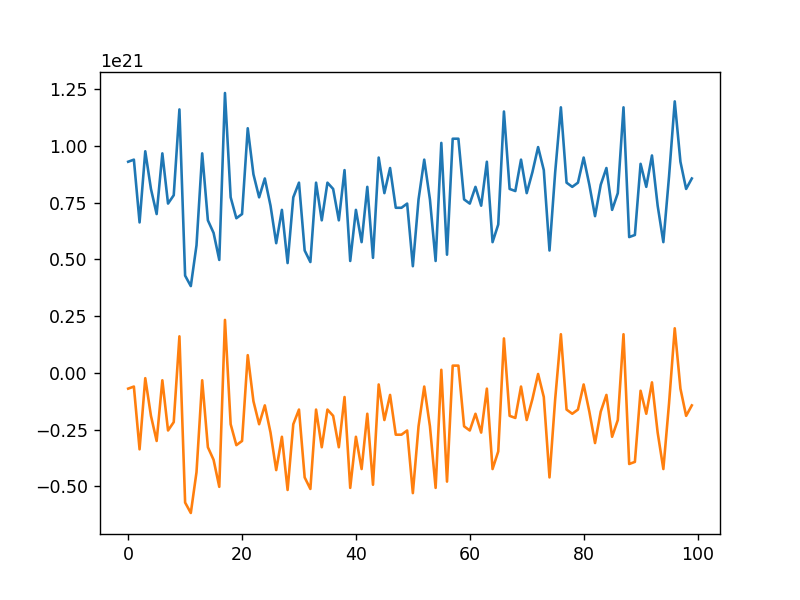

In [6]:
pulsar = np.fromfile('pulsar.dat')  

pulsar = pulsar[ : 1024*256  ]

four = Eichebrecher (pulsar[0:100])

pul = Umgekehrteichebrecher (four)

plt.plot (pulsar[0:100])

plt.plot ( np.real ( pul - 1e21 ) )

# В общем, работает хорошо.

In [7]:
def FFT ( dataset ):
    
    N = len( dataset )
    
    dataset = np.asarray ( dataset )
    
    fourier = np.empty (N, dtype = complex)
    
    W = np.exp ( 2j * np.pi / N )
    
    if N == 1:
    
        return dataset

    
    Gerade = FFT ( dataset [ 0 :: 2 ] )
    
    Ungerade  = FFT ( dataset [ 1 :: 2 ] )
    
    A = [ Gerade[k] + W ** k * Ungerade[k] for k in range ( N // 2 )  ]
    
    B = [ Gerade[k] - W ** k * Ungerade[k] for k in range ( N // 2 )  ]
    
    fourier = A + B
        
    return fourier   

In [8]:
def IFFT ( fourier ) :

    N = len( fourier )
    
    fourier = np.asarray ( fourier )
    
    dataset = np.empty (N, dtype = complex)
    
    W = np.exp ( - 2j * np.pi / N )
    
    if N == 1:
    
        return fourier

    
    Gerade = IFFT ( fourier [ 0 :: 2 ] )
    
    Ungerade  = IFFT ( fourier [ 1 :: 2 ] )
    
    A = [ ( Gerade[k] + W ** k * Ungerade[k] )  for k in range ( N // 2 )  ]
    
    B = [ ( Gerade[k] - W ** k * Ungerade[k] )  for k in range ( N // 2 )  ]
    
    dataset =  np.asarray ( A + B ) / N 
        
    return dataset

На этом моменте происходит нечто ужасное, хотя и не очень. Как нетрудно заметитть, IFFT работает хорошо, но почему-то выдает сигнал амплитудой в 1e46 раз меньше. Мне не удалось узнать, откуда выскакивает это число, но сигнал сам по себе всё равно восстанавливается, так что это не так уж и плохо. А вообще я долго это чинил, и так и не починил, и теперь мне обидно.

<IPython.core.display.Javascript object>


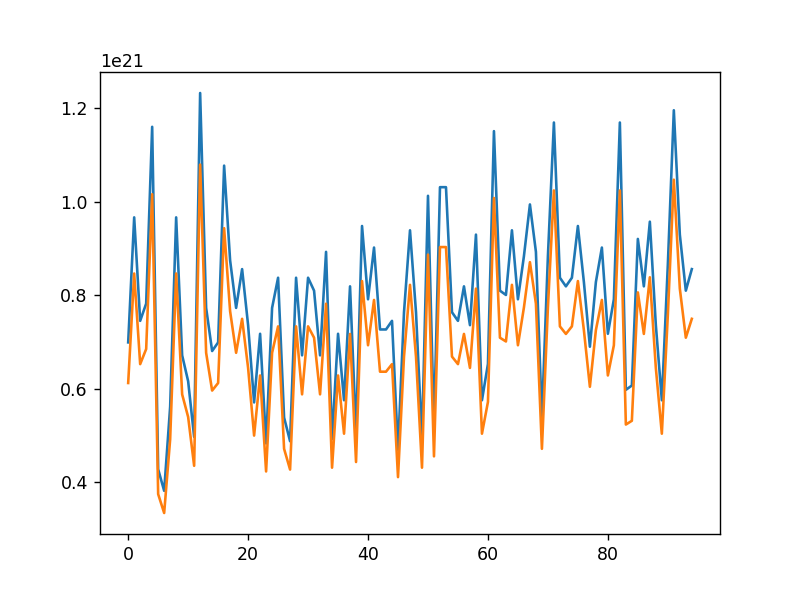

C:\Users\besag\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [9]:
dok = FFT ( pulsar )
bak = IFFT ( dok ) 

plt.plot (pulsar[ 5 : 100 ])

plt.plot (1e46 * bak[ 5 : 100 ])

Напоследок, сравним времена.

In [27]:
%%time
t = FFT(pulsar[0:2048])

Wall time: 65.8 ms


In [28]:
%%time
t = IFFT(t)

Wall time: 82.8 ms


In [29]:
%%time 
t = Eichebrecher (pulsar[0:2048])

Wall time: 14.1 s


In [30]:
%%time
t=Umgekehrteichebrecher (t)

Wall time: 7.85 s


In [32]:
%%time
t = np.fft.fft(pulsar[0:2048])

Wall time: 1e+03 µs


In [33]:
%%time
t = np.fft.ifft(t)

Wall time: 0 ns


Всё видно и без слов. Нампай бьет все рекорды, увы.